<a href="https://colab.research.google.com/github/Brunovncs/AnotaAI/blob/master/DesafiosPID.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Desafio 01

1- Quais mudanças morfológicas são usadas?

In [ ]:
import pandas as pd
import numpy as np
import cv2
from skimage.feature import graycomatrix, graycoprops
import matplotlib.pyplot as plt
from scipy import ndimage as ndi
from skimage.segmentation import watershed

In [ ]:
img01 = cv2.imread("img/original/Normal.jpg", cv2.IMREAD_GRAYSCALE)
img02 = cv2.imread("img/original/21h.jpg", cv2.IMREAD_GRAYSCALE)
img03 = cv2.imread("img/original/29h.jpg", cv2.IMREAD_GRAYSCALE)
img04 = cv2.imread("img/original/44h.jpg", cv2.IMREAD_GRAYSCALE)
img05 = cv2.imread("img/original/53h.jpg", cv2.IMREAD_GRAYSCALE)
img06 = cv2.imread("img/original/73h.jpg", cv2.IMREAD_GRAYSCALE)
img07 = cv2.imread("img/original/96h.jpg", cv2.IMREAD_GRAYSCALE)

histo1 = cv2.calcHist([img01], [0], None, [256], [0, 256])
histo2 = cv2.calcHist([img02], [0], None, [256], [0, 256])
histo3 = cv2.calcHist([img03], [0], None, [256], [0, 256])
histo4 = cv2.calcHist([img04], [0], None, [256], [0, 256])
histo5 = cv2.calcHist([img05], [0], None, [256], [0, 256])
histo6 = cv2.calcHist([img06], [0], None, [256], [0, 256])
histo7 = cv2.calcHist([img07], [0], None, [256], [0, 256])

In [ ]:
# Normalizar os histogramas
histograma1_normal = cv2.normalize(histo1, histo1)
histograma3 = cv2.normalize(histo3, histo3)
histograma5 = cv2.normalize(histo5, histo5)
histograma7_normal = cv2.normalize(histo7, histo7)

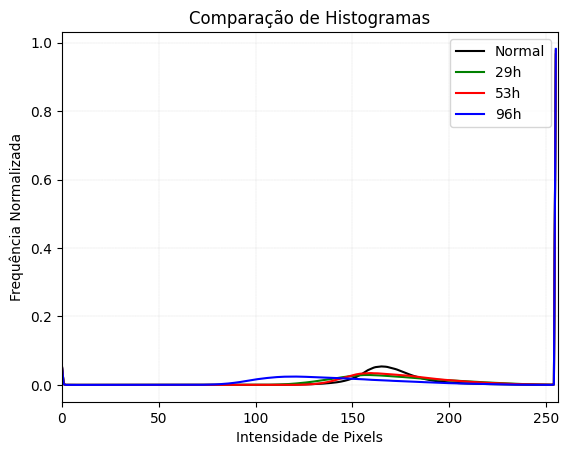

In [ ]:
# Plotar os histogramas
plt.figure()
plt.title('Comparação de Histogramas')
plt.xlabel('Intensidade de Pixels')
plt.ylabel('Frequência Normalizada')

plt.grid(True, color='gray', linestyle='--', linewidth=0.1)

plt.plot(histograma1_normal, label='Normal', color='black')
plt.plot(histograma3, label='29h', color='green')
plt.plot(histograma5, label='53h', color='red')
plt.plot(histograma7_normal, label='96h', color='blue')

plt.legend()
plt.xlim([0, 256])

plt.savefig("hist_img_histnormal-96.png")

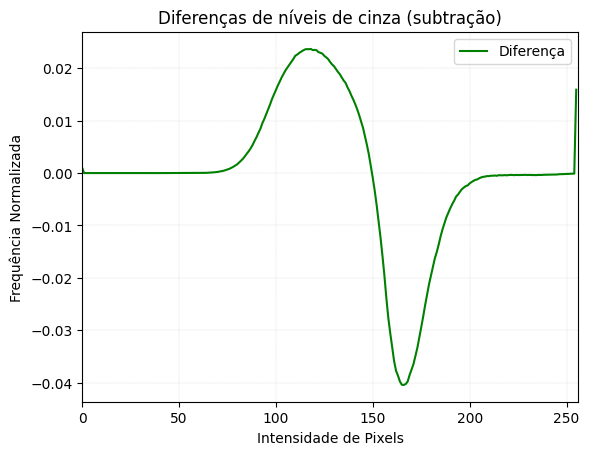

In [ ]:
hist_dif = histograma7_normal - histograma1_normal

plt.figure()
plt.title('Diferenças de níveis de cinza (subtração)')
plt.xlabel('Intensidade de Pixels')
plt.ylabel('Frequência Normalizada')
plt.grid(True, color='gray', linestyle='--', linewidth=0.1)

plt.plot(hist_dif, label='Diferença', color='green')
plt.legend()
plt.xlim([0, 256])

plt.savefig("hist_img_dif.png")


#### Filtro Salt and Pepper para remover ruídos e ressaltar os núcleos

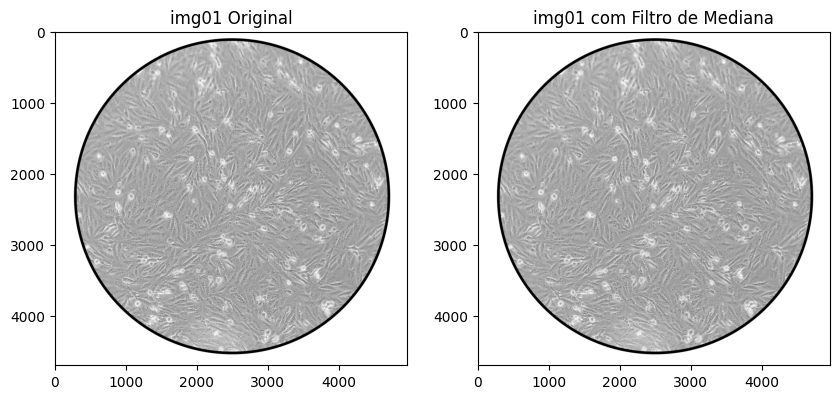

In [ ]:
img01_median = cv2.medianBlur(img01, 5)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('img01 Original')
plt.imshow(img01, cmap='gray')
plt.subplot(1, 2, 2)
plt.title('img01 com Filtro de Mediana')
plt.imshow(img01_median, cmap='gray')
plt.show()

Criação do histograma

In [ ]:
def filtra_fundo (image):
    # Converter para escala de cinza
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Aplicar a binarização de Otsu
    ret, binary_otsu = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

    # Encontrar os contornos do objeto
    contours, _ = cv2.findContours(binary_otsu, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Criar uma máscara para o objeto
    object_mask = np.zeros_like(binary_otsu)
    cv2.drawContours(object_mask, contours, -1, 255, thickness=cv2.FILLED)

    # Aplicar a segmentação por Watershed apenas no objeto
    distance = ndi.distance_transform_edt(object_mask)
    markers = ndi.label(object_mask)[0]
    labels = watershed(-distance, markers, mask=object_mask)

    # Remover a região do fundo (fundo branco)
    foreground = (labels > 0).astype(np.uint8)

    result = cv2.bitwise_and(image, image, mask=foreground)
    return result

In [ ]:
def remove_fundo(image):
    #Tranforma a imagem em cinza
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Aplicar uma binarização para detectar o fundo preto
    _, binary = cv2.threshold(gray, 10, 255, cv2.THRESH_BINARY)

    # Criar uma máscara para o fundo
    mask = binary.astype(np.uint8)

    # Combinar a máscara
    result = cv2.merge((image, mask))
    return result

In [ ]:
img01 = cv2.imread("img/original/Normal.jpg")
img02 = cv2.imread("img/original/21h.jpg")
img03 = cv2.imread("img/original/29h.jpg")
img04 = cv2.imread("img/original/44h.jpg")
img05 = cv2.imread("img/original/53h.jpg")
img06 = cv2.imread("img/original/73h.jpg")
img07 = cv2.imread("img/original/96h.jpg")

img01_fundo = filtra_fundo(img01)
img02_fundo = filtra_fundo(img02)
img03_fundo = filtra_fundo(img03)
img04_fundo = filtra_fundo(img04)
img05_fundo = filtra_fundo(img05)
img06_fundo = filtra_fundo(img06)
img07_fundo = filtra_fundo(img07)

cv2.imwrite('img/semborda/img01-fundopreto.png', img01_fundo)

img01_final = remove_fundo(img01_fundo)
img02_final = remove_fundo(img02_fundo)
img03_final = remove_fundo(img03_fundo)
img04_final = remove_fundo(img04_fundo)
img05_final = remove_fundo(img05_fundo)
img06_final = remove_fundo(img06_fundo)
img07_final = remove_fundo(img07_fundo)

cv2.imwrite('img/semborda/img01-final.png', img01_final)
cv2.imwrite('img/filtros/img01-final-blur.png', img01)

histo1 = cv2.calcHist([img01_final], [0], None, [256], [0, 256])
histo2 = cv2.calcHist([img02_final], [0], None, [256], [0, 256])
histo3 = cv2.calcHist([img03_final], [0], None, [256], [0, 256])
histo4 = cv2.calcHist([img04_final], [0], None, [256], [0, 256])
histo5 = cv2.calcHist([img05_final], [0], None, [256], [0, 256])
histo6 = cv2.calcHist([img06_final], [0], None, [256], [0, 256])
histo7 = cv2.calcHist([img07_final], [0], None, [256], [0, 256])

# Normalizar os histogramas
histograma1 = cv2.normalize(histo1, histo1)
histograma2 = cv2.normalize(histo2, histo2)
histograma3 = cv2.normalize(histo3, histo3)
histograma4 = cv2.normalize(histo4, histo4)
histograma5 = cv2.normalize(histo5, histo5)
histograma6 = cv2.normalize(histo6, histo6)
histograma7 = cv2.normalize(histo7, histo7)

#### Análise de histograma após pré-processamento

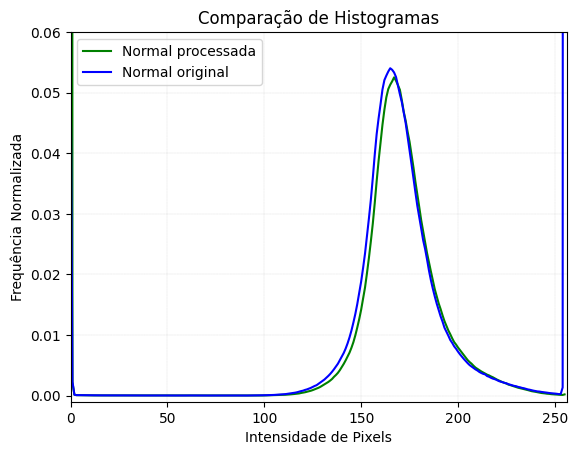

In [ ]:
# Plotar os histogramas
plt.figure()
plt.title('Comparação de Histogramas')
plt.xlabel('Intensidade de Pixels')
plt.ylabel('Frequência Normalizada')

plt.grid(True, color='gray', linestyle='--', linewidth=0.1)

plt.plot(histograma1, label='Normal processada', color='green')
plt.plot(histograma1_normal, label='Normal original', color='blue')

plt.legend()
plt.xlim([0, 256])
plt.ylim([-0.001, 0.06])

plt.savefig("img/hist/histograma-normal-filtro.png")

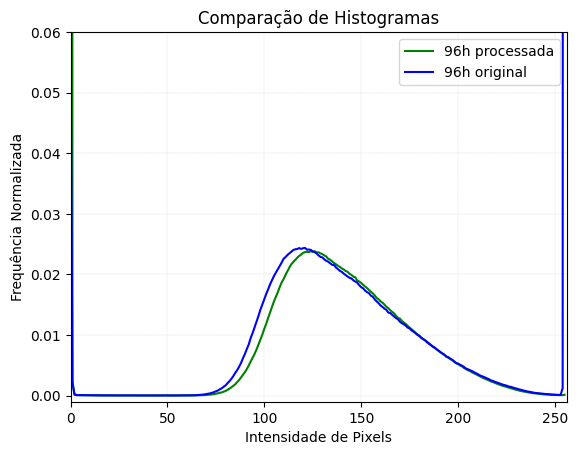

In [ ]:
# Plotar os histogramas
plt.figure()
plt.title('Comparação de Histogramas')
plt.xlabel('Intensidade de Pixels')
plt.ylabel('Frequência Normalizada')

plt.grid(True, color='gray', linestyle='--', linewidth=0.1)
plt.plot(histograma7, label='96h processada', color='green')
plt.plot(histograma7_normal, label='96h original', color='blue')

plt.legend()
plt.xlim([0, 256])
plt.ylim([-0.001, 0.06])

plt.savefig("img/hist/histograma-96h-filtro.png")

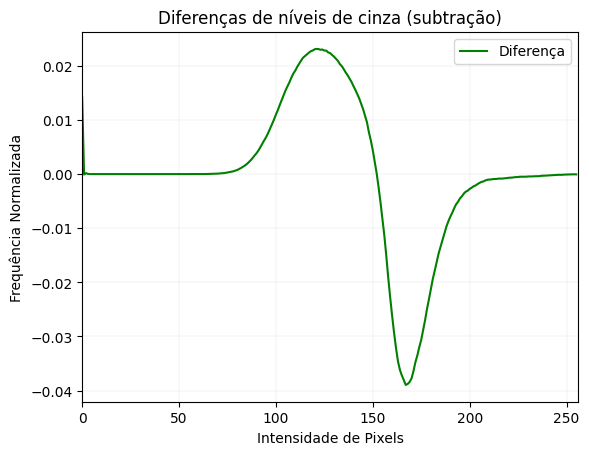

In [ ]:
hist_dif = histograma7 - histograma1

plt.figure()
plt.title('Diferenças de níveis de cinza (subtração)')
plt.xlabel('Intensidade de Pixels')
plt.ylabel('Frequência Normalizada')
plt.grid(True, color='gray', linestyle='--', linewidth=0.1)

plt.plot(hist_dif, label='Diferença', color='green')
plt.legend()
plt.xlim([0, 256])

plt.savefig("hist_img_dif.png")

#### Medidas estatísticas


In [ ]:
def calcular_moda_histograma(hist):
    """Calcula a moda diretamente do histograma."""
    moda_index = np.argmax(hist)
    moda_value = moda_index  # Se os bins representam os valores das intensidades, a moda é simplesmente o índice do bin
    return moda_value

def weighted_median(data, weights):
    """Calcular a mediana ponderada."""
    # Ordenar data e weights
    sorted_indices = np.argsort(data)
    data_sorted = data[sorted_indices]
    weights_sorted = weights[sorted_indices]

    # Calcular a soma cumulativa dos pesos
    cumulative_weights = np.cumsum(weights_sorted)

    # Encontrar a posição onde a soma cumulativa atinge 50% do total
    midpoint = 0.5 * cumulative_weights[-1]
    median_idx = np.searchsorted(cumulative_weights, midpoint)

    return data_sorted[median_idx]

def weighted_mode(data, weights):
    """Calcular a moda ponderada."""
    unique_data = np.unique(data)
    mode_value = unique_data[np.argmax([weights[data == val].sum() for val in unique_data])]
    return mode_value

def calcular_estatística(data, intensidades):
    if np.any(data < 0):
        raise ValueError("O array 'data' contém elementos negativos, o que não é permitido para o cálculo da moda com np.bincount.")

    # Calcular média ponderada
    weighted_mean = np.average(intensidades, weights=data)

    # Calcular mediana ponderada
    weighted_median_value = weighted_median(intensidades, data)

    # Calcular outras estatísticas
    info = {
        'mean': weighted_mean,
        'median': weighted_median_value,
        'std_dev': np.sqrt(np.average((intensidades - weighted_mean)**2, weights=data)),
        'variance': np.average((intensidades - weighted_mean)**2, weights=data),
        'data_range': np.ptp(intensidades),
        'quartiles': np.percentile(intensidades, [25, 50, 75]),
    }
    return info

# Garantir que data é unidimensional
histogramas = [histograma1, histograma2, histograma3, histograma4, histograma5, histograma6, histograma7]

stats = []

for num, hist in enumerate(histogramas):

    intensidades = np.arange(len(hist))  # Supondo que os bins do histograma são as intensidades de pixel
    data = np.ravel(hist)

    try:
        obj = calcular_estatística(data, intensidades)

        # Plotar os histogramas

        print(f"Média: {obj['mean']:.2f}")
        print(f"Mediana: {obj['median']:.5f}")
        print(f"Moda: {calcular_moda_histograma(hist)}")
        print(f"Desvio Padrão: {obj['std_dev']:.2f}")
        print(f"Variância: {obj['variance']:.2f}")
        print(f"Amplitude: {obj['data_range']:.2f}")
        print(f"Quartis: {obj['quartiles']}")

        stats.append(obj)
    except ValueError as e:
        print(f"Erro ao processar os dados: {e}")

    # Plotar histograma
    plt.figure()
    plt.grid(True, color='gray', linestyle='--', linewidth=0.1)
    plt.plot(intensidades, data, label='Normal', color='black')

    plt.title('Histograma dos Dados')
    plt.xlabel('Valor')
    plt.ylabel('Frequência')
    plt.xlim([0, 256])
    plt.ylim([0, 0.06])

    plt.axvline(obj['mean'].astype(int), color='r', linestyle='dashed', linewidth=1, label=f'Média: {obj["mean"]:.2f}')
    plt.axvline(obj['median'], color='g', linestyle='dashed', linewidth=1, label=f'Mediana: {obj["median"]:.2f}')

    plt.legend()
    plt.savefig(f'img/hist/hist{num}.png')
    plt.close()


# Criar DataFrame com as estatísticas
df_stats = pd.DataFrame(stats)
df_stats

Média: 110.89
Mediana: 160.00000
Moda: 0
Desvio Padrão: 83.63
Variância: 6993.63
Amplitude: 255.00
Quartis: [ 63.75 127.5  191.25]
Média: 114.29
Mediana: 161.00000
Moda: 0
Desvio Padrão: 86.45
Variância: 7473.64
Amplitude: 255.00
Quartis: [ 63.75 127.5  191.25]
Média: 113.55
Mediana: 156.00000
Moda: 0
Desvio Padrão: 86.88
Variância: 7547.62
Amplitude: 255.00
Quartis: [ 63.75 127.5  191.25]
Média: 114.94
Mediana: 159.00000
Moda: 0
Desvio Padrão: 87.51
Variância: 7657.86
Amplitude: 255.00
Quartis: [ 63.75 127.5  191.25]
Média: 113.52
Mediana: 157.00000
Moda: 0
Desvio Padrão: 86.31
Variância: 7450.22
Amplitude: 255.00
Quartis: [ 63.75 127.5  191.25]
Média: 109.99
Mediana: 152.00000
Moda: 0
Desvio Padrão: 83.73
Variância: 7010.34
Amplitude: 255.00
Quartis: [ 63.75 127.5  191.25]
Média: 92.05
Mediana: 117.00000
Moda: 0
Desvio Padrão: 72.79
Variância: 5298.19
Amplitude: 255.00
Quartis: [ 63.75 127.5  191.25]


mean  median    std_dev     variance  data_range  \
0  110.886780     160  83.627929  6993.630466         255   
1  114.294714     161  86.450224  7473.641225         255   
2  113.548294     156  86.877056  7547.622928         255   
3  114.939490     159  87.509205  7657.860983         255   
4  113.520757     157  86.314675  7450.223128         255   
5  109.988261     152  83.727770  7010.339431         255   
6   92.052552     117  72.788656  5298.188442         255   

                quartiles  
0  [63.75, 127.5, 191.25]  
1  [63.75, 127.5, 191.25]  
2  [63.75, 127.5, 191.25]  
3  [63.75, 127.5, 191.25]  
4  [63.75, 127.5, 191.25]  
5  [63.75, 127.5, 191.25]  
6  [63.75, 127.5, 191.25]

4 - Quantos núcleos são formados?


91


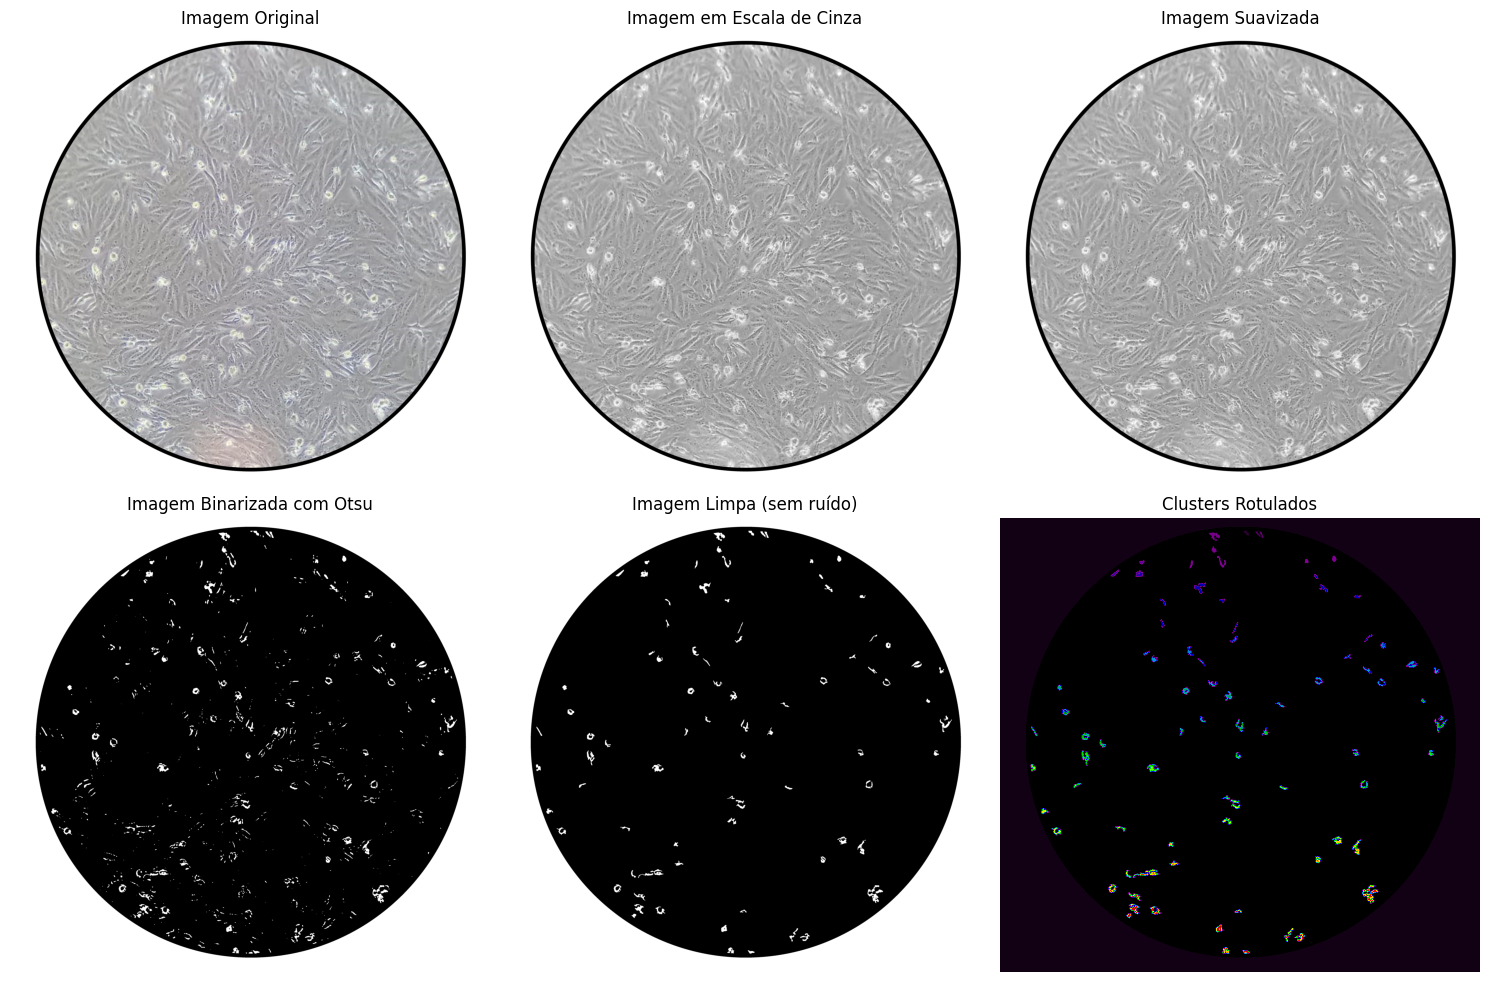

In [ ]:
import numpy as np
from skimage import filters, measure, io, color, morphology
import matplotlib.pyplot as plt

image = io.imread('img/original/Normal.jpg')

# Converter a imagem para escala de cinza
gray_img = color.rgb2gray(image)

# Aplicar filtro Gaussiano para suavizar a imagem
smoothed_img = filters.gaussian(gray_img, sigma=1)

# Aplicar o threshold multi-otsu
val = filters.threshold_multiotsu(smoothed_img, classes=4)
otsu = smoothed_img > val[2]

# Remover pequenos objetos (ruído) da imagem binária
cleaned_otsu = morphology.remove_small_objects(otsu, min_size=900)

# Rotular os componentes conectados na imagem binária
clusters = measure.label(cleaned_otsu, connectivity=2)

# Contar os rótulos únicos (clusters)
unique_clusters = np.unique(clusters)

# Subtrair 1 para descontar o rótulo 0 que representa o fundo
print(len(unique_clusters) - 1)

# Exibir as imagens em cada etapa do processamento
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
ax = axes.ravel()

ax[0].imshow(image)
ax[0].set_title("Imagem Original")

ax[1].imshow(gray_img, cmap='gray')
ax[1].set_title("Imagem em Escala de Cinza")

ax[2].imshow(smoothed_img, cmap='gray')
ax[2].set_title("Imagem Suavizada")

ax[3].imshow(otsu, cmap='gray')
ax[3].set_title("Imagem Binarizada com Otsu")

ax[4].imshow(cleaned_otsu, cmap='gray')
ax[4].set_title("Imagem Limpa (sem ruído)")

ax[5].imshow(clusters, cmap='nipy_spectral')
ax[5].set_title("Clusters Rotulados")

for a in ax:
    a.axis('off')

plt.tight_layout()

plt.savefig('output.png')

Com o algoritmo criado, foi possível detectar aproximadamente 91 núcleos. Também foi gerada uma imagem para melhor representação visual.

## Desafio 02

**1** - Receba as imagens como entrada;
**2** - Aplique limiarização ótima de Otsu e Watershed. Os algoritmos podem/devem ser adaptados para obter múltiplas segmentações, caso seja necessário;


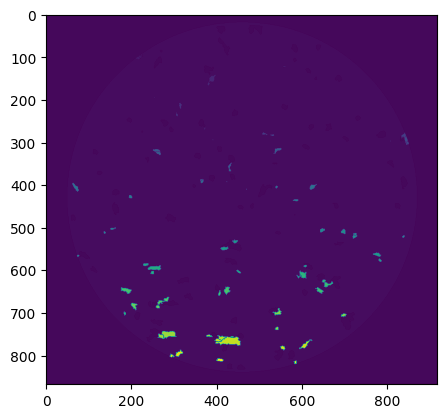

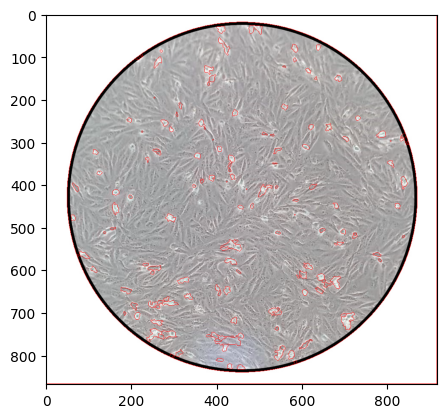

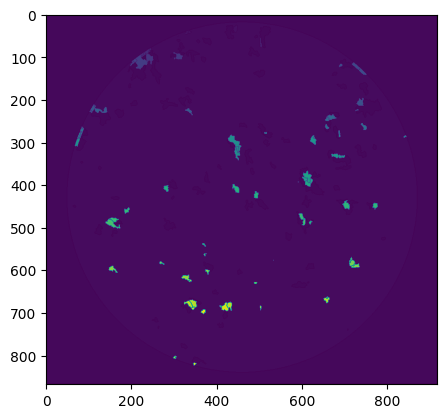

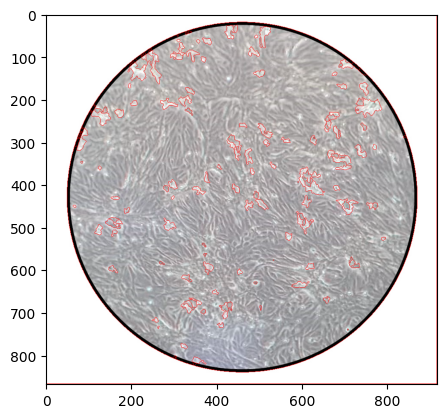

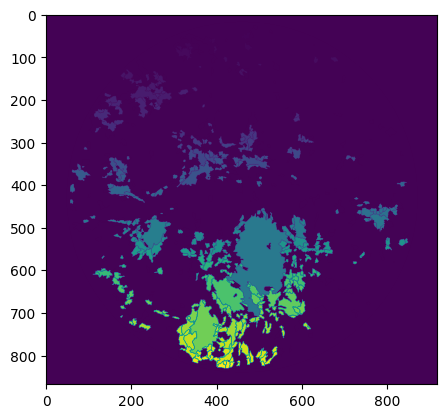

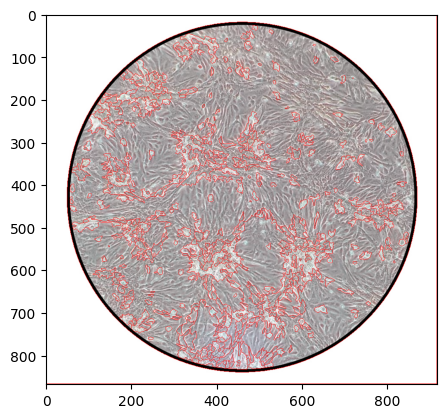

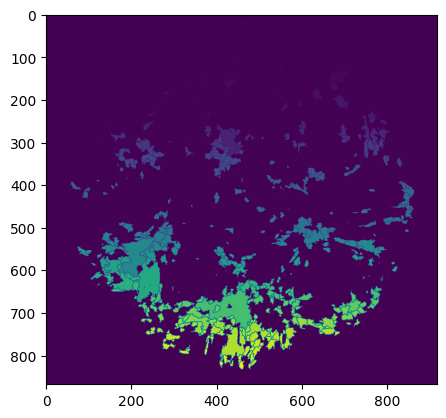

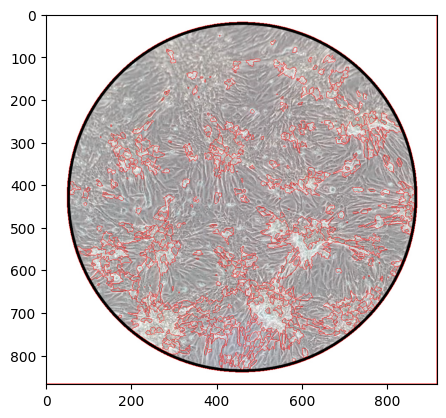

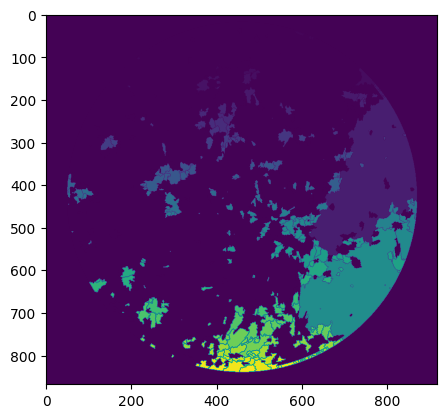

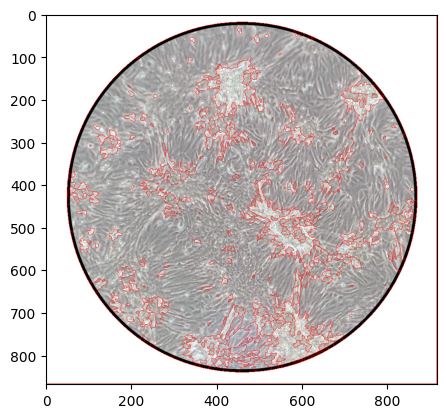

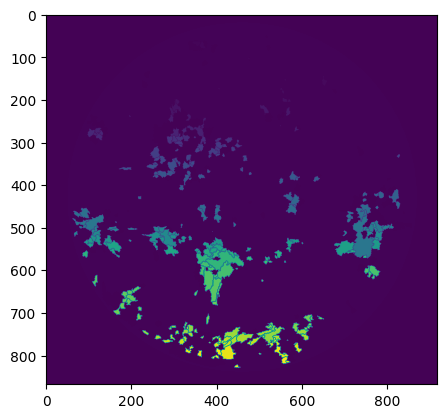

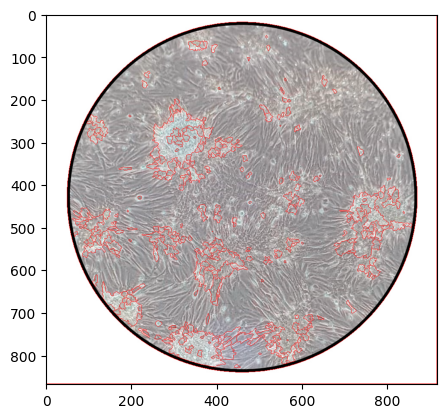

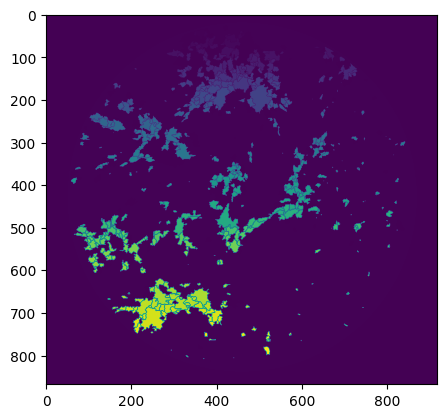

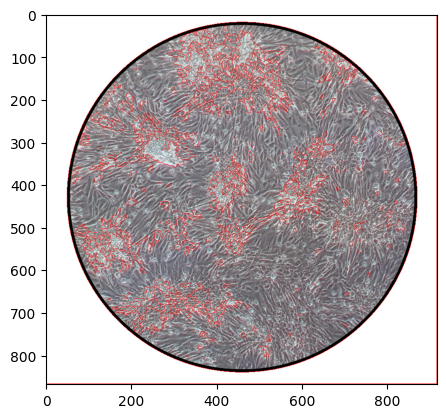

In [ ]:
import numpy as np
import cv2 as cv
import cv2
from matplotlib import pyplot as plt

def imshow(img, ax=None):
    if ax is None:
        plt.imshow(img)
        plt.show()

    else:
        ax.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        ax.axis('off')

image_filenames = ["Normal.jpg", "21h.jpg", "29h.jpg", "44h.jpg", "53h.jpg", "73h.jpg", "96h.jpg"]

for filename in image_filenames:

    img = cv.imread(filename)
    assert img is not None, "erro ao ler imagens"
    gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
    ret, thresh = cv.threshold(gray,0,255,cv.THRESH_BINARY_INV+cv.THRESH_OTSU)



    kernel = np.ones((3,3),np.uint8)
    opening = cv.morphologyEx(thresh,cv.MORPH_OPEN,kernel, iterations = 2)
    sure_bg = cv.dilate(opening,kernel,iterations=3)
    dist_transform = cv.distanceTransform(opening,cv.DIST_L2,5)
    ret, sure_fg = cv.threshold(dist_transform,0.1*dist_transform.max(),255,0)
    sure_fg = np.uint8(sure_fg)
    unknown = cv.subtract(sure_bg,sure_fg)

    ret, markers = cv.connectedComponents(sure_fg)
    markers = markers+1
    markers[unknown==255] = 0

    markers = cv.watershed(img,markers)
    img[markers == -1] = [255,0,0]
    imshow(markers)
    imshow(img)



    markers_visual = cv.normalize(markers, None, 0, 255, cv.NORM_MINMAX).astype(np.uint8)
    markers_color = cv.applyColorMap(markers_visual, cv.COLORMAP_JET)
    concatenated_img = np.hstack((markers_color, img))

    output_filename = f'concatenated_{filename}'
    cv.imwrite(output_filename, concatenated_img)

**3** - Obtenha uma matriz de co-ocorrência que representa a média das matrizes calculadas via d=1 e diferentes ângulos (0, 90, 180, 270). Obtenha os descritores segundo momento angular, entropia, correlação, contraste e homogeneidade

Obs: matriz aplicada sobre as imagens de forma inteira  
Mudanças : talvez segmentar e ver se aumenta a lupa da análise?

In [ ]:
import cv2
import numpy as np
import pandas as pd
from skimage.feature import graycomatrix, graycoprops
from skimage.measure import shannon_entropy


# Função para calcular a matriz de co-ocorrência média
def calcular_matriz_coocorrencia_media(img, distance=1, angles=[0, 90, 180, 270]):
    glcms = [graycomatrix(img, [distance], [angle], levels=256, symmetric=True, normed=True) for angle in angles]
    glcm_media = np.mean(glcms, axis=0)
    return glcm_media

# Função para calcular os descritores de textura
def calcular_descritores_textura(glcm_media):

    entropy = shannon_entropy(glcm_media)

    descritores = {
        'Segundo Momento Angular': graycoprops(glcm_media, 'ASM')[0, 0],
        'Entropia': entropy,
        'Correlação': graycoprops(glcm_media, 'correlation')[0, 0],
        'Contraste': graycoprops(glcm_media, 'contrast')[0, 0],
        'Homogeneidade': graycoprops(glcm_media, 'homogeneity')[0, 0]
    }
    return descritores

# Carregar imagens em escala de cinza
imgs_gray = [cv2.imread(img, cv2.IMREAD_GRAYSCALE) for img in ["Normal.jpg","21h.jpg","29h.jpg","44h.jpg","53h.jpg","73h.jpg","96h.jpg"]]

# Definir parâmetros da matriz de co-ocorrência
distance = 1
angles = [0, 90, 180, 270]
a = 0

descritores_all = []

# Calcular matriz de co-ocorrência média e descritores de textura para cada imagem
for img_gray in imgs_gray:
    glcm_media = calcular_matriz_coocorrencia_media(img_gray, distance, angles)
    descritores = calcular_descritores_textura(glcm_media)
    descritores_all.append(descritores)

desc_df = pd.DataFrame(descritores_all)
print(desc_df)


   Segundo Momento Angular  Entropia  Correlação   Contraste  Homogeneidade
0                 0.102721  4.817422    0.958439  214.376019       0.438339
1                 0.102870  3.779268    0.964065  175.079033       0.445675
2                 0.102510  5.668658    0.936722  358.862807       0.386584
3                 0.102506  4.941417    0.947434  274.826536       0.399825
4                 0.102611  4.579813    0.956674  226.075072       0.417073
5                 0.102494  4.844868    0.956571  244.043664       0.410774
6                 0.102439  6.782698    0.951693  408.093061       0.381035


**4** - Obtenha a Dimensão fractal (DF), usando Box-couting, capaz de quantificar imagens monocromáticas (espaço tridimensional). Considere iterações realizadas enquanto lado da caixa >=2. A DF deve ser definida via coeficiente angular da regressão log x log. Apresente os gráficos;
**5** - Os descritores devem ser organizados como vetores de características, respeitando a ordem posicional: segundo momento angular, entropia, correlação, contraste, homogeneidade e DF;


TypeError: cannot unpack non-iterable numpy.float64 object

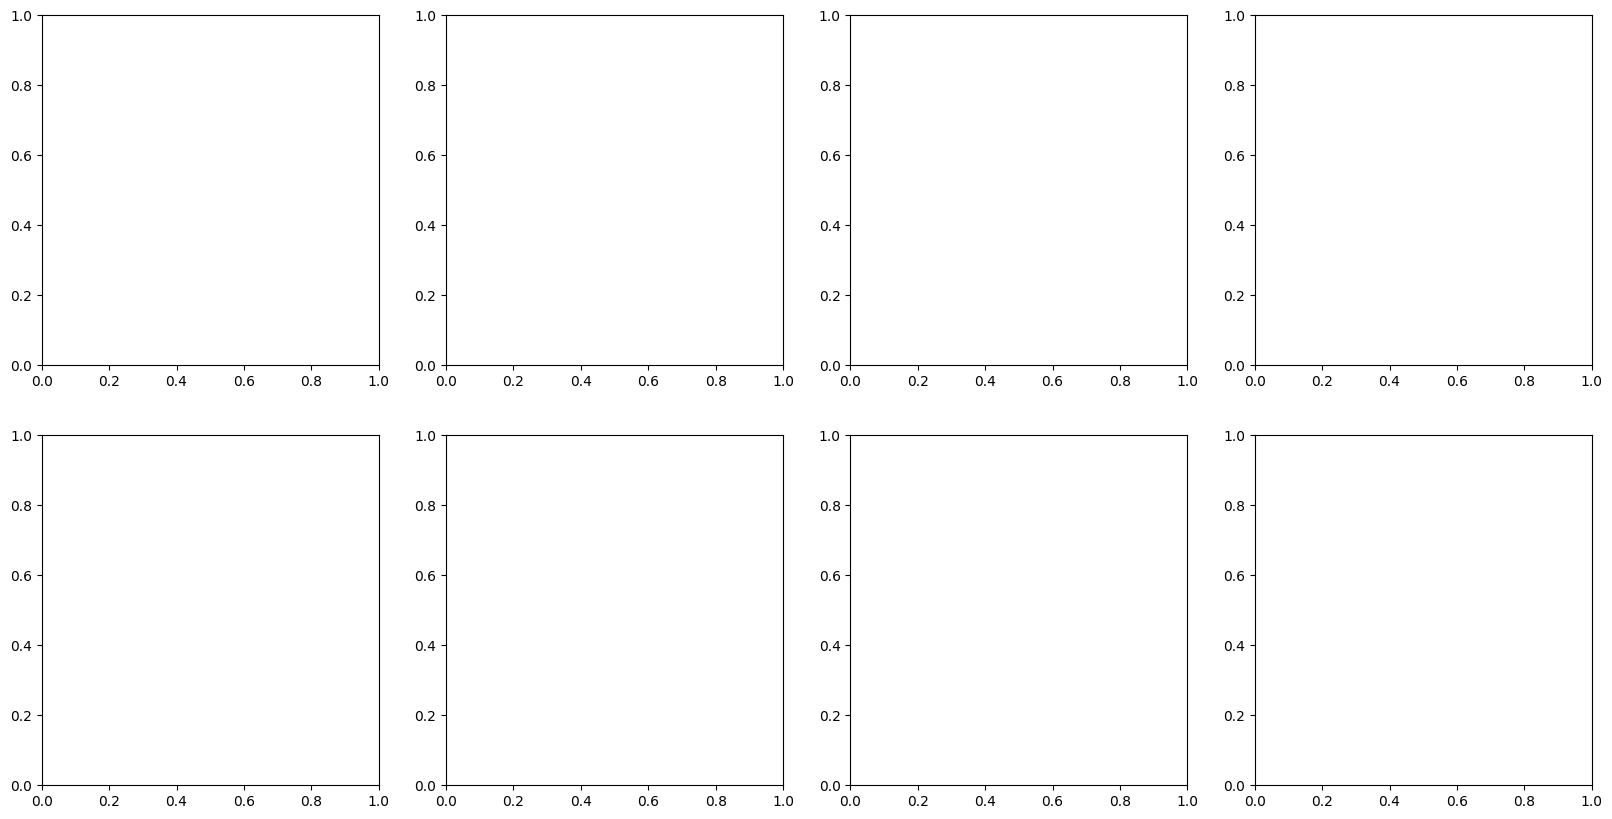

In [ ]:
import cv2
import numpy as np
from skimage.feature import graycomatrix, graycoprops
from skimage.measure import shannon_entropy
import matplotlib.pyplot as plt

def calcular_dimensao_fractal2(img_binaria):
    dimensoes = []
    tamanhos_caixa = []

    # Loop para diferentes tamanhos de caixa
    tamanho_caixa = len(img_binaria)
    while tamanho_caixa >= 2:
        tamanhos_caixa.append(tamanho_caixa)
        dimensoes.append(np.log(np.sum(img_binaria)) / np.log(tamanho_caixa))
        tamanho_caixa //= 2

     # Calcular coeficiente angular da regressão log x log
    coef_angular, _ = np.polyfit(np.log(tamanhos_caixa), np.log(dimensoes), 1)

    return coef_angular, tamanhos_caixa, dimensoes

def calcular_dimensao_fractal(Z):
  def boxcount(Z, k):
      S = np.add.reduceat(
          np.add.reduceat(Z, np.arange(0, Z.shape[0], k), axis=0),
                              np.arange(0, Z.shape[1], k), axis=1)
      return len(np.where((S > 0) & (S < k*k))[0])

  Z = (Z < 255)
  if Z.sum() == 0:
      return np.nan
  p = min(Z.shape)
  n = 2**np.floor(np.log(p)/np.log(2))
  if n < 2:
      return np.nan
  sizes = 2**np.arange(int(np.log(n)/np.log(2)), 1, -1)
  counts = [boxcount(Z, size) for size in sizes]
  if len(counts) < 2 or any(c == 0 for c in counts):
      return np.nan
  coeffs = np.polyfit(np.log(sizes), np.log(counts), 1)
  return -coeffs[0]



# Função para calcular a matriz de co-ocorrência média
def calcular_matriz_coocorrencia_media(img, distance=1, angles=[0, 90, 180, 270]):
    glcms = [graycomatrix(img, [distance], [angle], levels=256, symmetric=True, normed=True) for angle in angles]
    glcm_media = np.mean(glcms, axis=0)
    return glcm_media

# Função para calcular os descritores de textura
def calcular_descritores_textura(glcm_media):

    entropy = shannon_entropy(glcm_media)

    descritores = {
        'Segundo Momento Angular': graycoprops(glcm_media, 'ASM')[0, 0],
        'Entropia': entropy,
        'Correlação': graycoprops(glcm_media, 'correlation')[0, 0],
        'Contraste': graycoprops(glcm_media, 'contrast')[0, 0],
        'Homogeneidade': graycoprops(glcm_media, 'homogeneity')[0, 0]
    }
    return descritores



# Carregar imagens em escala de cinza
imgs_gray = [cv2.imread(img, cv2.IMREAD_GRAYSCALE) for img in ["Normal.jpg","21h.jpg","29h.jpg","44h.jpg","53h.jpg","73h.jpg","96h.jpg"]]

# Definir parâmetros da matriz de co-ocorrência
distance = 1
angles = [0, 90, 180, 270]
a = 0

# Criar subplots para exibir múltiplos gráficos lado a lado
n_rows = 2
n_cols = len(imgs_gray) // n_rows + (len(imgs_gray) % n_rows > 0)
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 10))

# Loop sobre as imagens
for i, img_gray in enumerate(imgs_gray):
    _, img_binaria = cv2.threshold(img_gray, 128, 255, cv2.THRESH_BINARY)

    # Calcular a Dimensão Fractal (DF)
    coef_angular, tamanhos_caixa, dimensoes = calcular_dimensao_fractal(img_binaria)

    glcm_media = calcular_matriz_coocorrencia_media(img_gray, distance, angles)

    descritores = calcular_descritores_textura(glcm_media)

    a = a + 1

    print('DF : ', dimensoes)
    print()

    # Organizar descritores de textura e DF em um vetor
    vetor_caracteristicas = list(descritores.values()) + [coef_angular]

    # Adicionar vetor de características à lista de descritores e DF
    print(vetor_caracteristicas)

    # Plotar o gráfico da Dimensão Fractal (DF)
    ax = axes[i // n_cols, i % n_cols]
    ax.plot(np.log(tamanhos_caixa), np.log(dimensoes), marker='o', linestyle='-')
    ax.set_title(f'Imagem {a}')
    ax.set_xlabel('Log do Tamanho da Caixa')
    ax.set_ylabel('Log da Dimensão Fractal')
    ax.grid(True)

# Ajustar layout e salvar a figura
plt.tight_layout()
plt.savefig('box_counting_all.png')
plt.close()

***SAÍDA***:
Descritores de textura para imagem(0):
Segundo Momento Angular: 0.10272050186944874
Entropia: 4.817421701498314
Correlação: 0.9584393273166127
Contraste: 214.37601857214096
Homogeneidade: 0.43833889596444353
DF :  [2.8228370379777292, 3.145021656099303, 3.550226951008989, 4.079308257648402, 4.788150655716973, 5.79514622680848, 7.446484868264185, 10.659832921898875, 17.38543868042544]      

Descritores de textura para imagem(1):
Segundo Momento Angular: 0.10286987867691841
Entropia: 3.779268069959283
Correlação: 0.9640652565309983
Contraste: 175.07903303207263
Homogeneidade: 0.44567469175473423
DF :  [2.823755414269455, 3.1460448513057804, 3.551381974915147, 4.0806354118340895, 4.78970842330478, 5.7970316083697195, 7.448907493115603, 10.663300971133571, 17.391094825109157]   

Descritores de textura para imagem(2):
Segundo Momento Angular: 0.10251013026542008
Entropia: 5.668657553981183
Correlação: 0.9367220925924633
Contraste: 358.8628068070434
Homogeneidade: 0.3865837711005027
DF :  [2.819513617224583, 3.141318916585703, 3.546047149706745, 4.07450555117277, 4.7825134053038925, 5.788323406724085, 7.437717871793532, 10.647282742954403, 17.364970220172253]     

Descritores de textura para imagem(3):
Segundo Momento Angular: 0.10250567173080274
Entropia: 4.941416590955771
Correlação: 0.9474341139108673
Contraste: 274.8265361929332
Homogeneidade: 0.39982485041457555
DF :  [2.8226391293803537, 3.144801159196258, 3.5499780452355467, 4.079022258079645, 4.78781495933509, 5.794739930148098, 7.445962796548449, 10.659085562928645, 17.384219790444295]    

Descritores de textura para imagem(4):
Segundo Momento Angular: 0.10261115304643265
Entropia: 4.5798132904463165
Correlação: 0.9566736822688245
Contraste: 226.07507186664668
Homogeneidade: 0.4170734458613825
DF :  [2.823316273374357, 3.145555589047074, 3.5508296759973947, 4.080000805211198, 4.788963544044473, 5.796130073613364, 7.447749064206534, 10.661642650618454, 17.38839022084009]     

Descritores de textura para imagem(5):
Segundo Momento Angular: 0.1024935175804614
Entropia: 4.844868059054569
Correlação: 0.9565706211382066
Contraste: 244.04366399387996
Homogeneidade: 0.41077441242385593
DF :  [2.821548857213526, 3.1435864487721057, 3.548606831248154, 4.077446695553935, 4.785965618646884, 5.792501654771666, 7.443086720075262, 10.65496838613756, 17.377504964314998]     

Descritores de textura para imagem(6):
Segundo Momento Angular: 0.10243876166648291
Entropia: 6.782698295158651
Correlação: 0.9516934495218303
Contraste: 408.09306065894583
Homogeneidade: 0.3810349084229973
DF :  [2.775834914952497, 3.0926549438845243, 3.4911132998581023, 4.0113850491867495, 4.708424747648054, 5.698653169562499, 7.322495919141418, 10.482339580383686, 17.095959508687496]

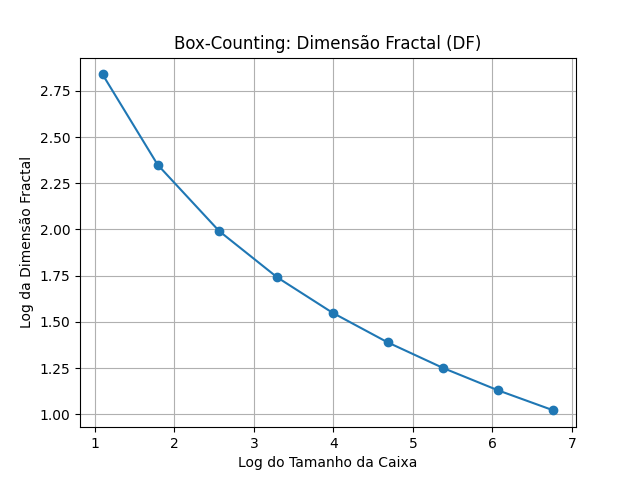

6. Apresente os espaços de características para cada categoria (objeto e fundo) em função dos resultados via Otsu e Watershed.

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.feature import peak_local_max
from skimage.segmentation import watershed
from scipy import ndimage as ndi
from skimage.morphology import remove_small_objects, disk
from skimage.measure import regionprops, label
from skimage.filters.rank import entropy

# Função para calcular a dimensão fractal usando o método de contagem de caixas
def fractal_dimension(Z):
    def boxcount(Z, k):
        S = np.add.reduceat(
            np.add.reduceat(Z, np.arange(0, Z.shape[0], k), axis=0),
                               np.arange(0, Z.shape[1], k), axis=1)
        return len(np.where((S > 0) & (S < k*k))[0])

    Z = (Z < 255)
    if Z.sum() == 0:
        return np.nan
    p = min(Z.shape)
    n = 2**np.floor(np.log(p)/np.log(2))
    if n < 2:
        return np.nan
    sizes = 2**np.arange(int(np.log(n)/np.log(2)), 1, -1)
    counts = [boxcount(Z, size) for size in sizes]
    if len(counts) < 2 or any(c == 0 for c in counts):
        return np.nan
    coeffs = np.polyfit(np.log(sizes), np.log(counts), 1)
    return -coeffs[0]

# Carregar a imagem
image_path = '96h.jpg'
image = cv2.imread(image_path)

# Converter para escala de cinza
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Aplicar a binarização de Otsu
ret, binary_otsu = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

# Remover pequenos objetos que podem ser ruído
binary_otsu = remove_small_objects(binary_otsu.astype(bool), min_size=50).astype(np.uint8)

# Aplicar filtro de distância
distance = ndi.distance_transform_edt(binary_otsu)

# Encontrar picos locais
local_maxi = peak_local_max(distance, min_distance=20, labels=binary_otsu)

# Criar marcadores para a segmentação watershed
markers = np.zeros_like(distance, dtype=bool)
markers[tuple(local_maxi.T)] = True
markers, _ = ndi.label(markers)

# Aplicar marcador e algoritmo Watershed
labels = watershed(-distance, markers, mask=binary_otsu)

# Remover pequenos objetos que podem ser ruído
labels = remove_small_objects(labels, min_size=50)

# Extrair características
regions = regionprops(labels, intensity_image=gray)

# Lista para armazenar características
features_objects = []
features_background = []

# Calcular entropia uma vez para a imagem inteira
entropy_image = entropy(gray, disk(3))

# Limpar as regiões muito pequenas que não são núcleos de células
min_area = 200  # Valor ajustável
valid_labels = [region.label for region in regions if region.area >= min_area]
filtered_labels = np.isin(labels, valid_labels)

# Separar objetos e fundo
object_mask = np.isin(labels, valid_labels)
background_mask = ~object_mask

# Calcular características para os objetos
for region in regions:
    if region.area >= min_area:
        area = region.area
        perimeter = region.perimeter
        circularity = (perimeter ** 2) / (4 * np.pi * area) if area > 0 else 0
        mean_intensity = region.mean_intensity
        intensity_image = region.intensity_image
        std_intensity = np.std(intensity_image)
        minr, minc, maxr, maxc = region.bbox
        aspect_ratio = (maxc - minc) / (maxr - minr) if (maxr - minr) > 0 else 0
        region_entropy = np.mean(entropy_image[region.coords[:, 0], region.coords[:, 1]])
        region_df = fractal_dimension(region.image)

        features_objects.append({
            'Area': area,
            'Perimeter': perimeter,
            'Circularity': circularity,
            'Mean Intensity': mean_intensity,
            'Standard Deviation Intensity': std_intensity,
            'Aspect Ratio': aspect_ratio,
            'Entropy': region_entropy,
            'Fractal Dimension': region_df
        })

# Calcular características para o fundo
background_area = np.sum(background_mask)
background_perimeter = np.sum(np.pad(background_mask.astype(int), pad_width=1, mode='constant')[1:-1, 1:-1])  # Ajuste no índice de fatiamento
background_mean_intensity = np.mean(gray[background_mask])
background_std_intensity = np.std(gray[background_mask])
background_entropy = np.mean(entropy_image[background_mask])
background_df = fractal_dimension(background_mask)

features_background = {
    'Area': background_area,
    'Perimeter': background_perimeter,
    'Mean Intensity': background_mean_intensity,
    'Standard Deviation Intensity': background_std_intensity,
    'Entropy': background_entropy,
    'Fractal Dimension': background_df
}


# Exibir as características
print("Características dos Objetos:")
for i, feature in enumerate(features_objects):
    print(f"Objeto {i + 1}:")
    for key, value in feature.items():
        if np.isnan(value):
            print(f"  {key}: NaN")
        else:
            print(f"  {key}: {value:.2f}")

print("\nCaracterísticas do Fundo:")
for key, value in features_background.items():
    if np.isnan(value):
        print(f"  {key}: NaN")
    else:
        print(f"  {key}: {value:.2f}")

# Calcular média de todas as características para os objetos
total_features = len(features_objects)
mean_features_objects = {}

for feature_name in features_objects[0].keys():
    feature_sum = 0
    count = 0
    for feature in features_objects:
        if not np.isnan(feature[feature_name]):
            feature_sum += feature[feature_name]
            count += 1
    mean_features_objects[feature_name] = feature_sum / count if count != 0 else np.nan

print("Média das características dos objetos:")
for key, value in mean_features_objects.items():
    print(f"{key}: {value:.2f}" if not np.isnan(value) else f"{key}: nan")


# Plotar os resultados
fig, axes = plt.subplots(1, 4, figsize=(24, 6), sharex=True, sharey=True)
ax = axes.ravel()

ax[0].imshow(gray, cmap=plt.cm.gray)
ax[0].set_title('Imagem em escala de cinza')

ax[1].imshow(binary_otsu, cmap=plt.cm.gray)
ax[1].set_title('Binarização de Otsu')

ax[2].imshow(labels, cmap=plt.cm.nipy_spectral)
ax[2].set_title('Segmentação por Watershed')

ax[3].imshow(object_mask, cmap=plt.cm.gray)
ax[3].set_title('Classificação de Núcleos e Fundo')

for a in ax:
    a.axis('off')

plt.tight_layout()
plt.show()

# Salvar resultados
cv2.imwrite('gray_image.jpg', gray)
cv2.imwrite('binary_otsu.jpg', binary_otsu)
cv2.imwrite('watershed_labels.jpg', (labels * (255 / labels.max())).astype(np.uint8))
cv2.imwrite('classified_image.jpg', object_mask.astype(np.uint8) * 255)


KeyboardInterrupt: 